# Code Description

In [23]:
              
      ##-----****---"On Duality of Stability and Capacity Regions in Intermittent Interference Networks"---****-----##
        
          ##---- This code is simulated the results of "ORDINARY PROCEDURE" in non-homogeneous setting  ----##

                                  ## ---- Sajjad Nassirpour and Alireza Vahid ---- ##
        
                       ## ---- Electrical engineering at University of Codolardo Denver ---- ##

# Import Packages

In [24]:
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Function for finding the row of origin queues in Control Table

In [25]:
## ---- Calculation for finding the row in control table ---- ##

def ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2):
    if number_of_packets_Q1[0,0]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=0
            pointer_2=0
            control_num=15
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=0
            pointer_2=1
            control_num=12
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=0
            pointer_2=3
            control_num=13
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=0
            pointer_2=2
            control_num=14
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=0
            pointer_2=4
            control_num=21

        
    elif number_of_packets_Q1[0,1]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=1
            pointer_2=0
            control_num=9
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=1
            pointer_2=1
            control_num=0
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=1
            pointer_2=3
            control_num=1
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=1
            pointer_2=2
            control_num=2
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=1
            pointer_2=4
            control_num=22

            
    elif number_of_packets_Q1[0,2]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=2
            pointer_2=0
            control_num=10
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=2
            pointer_2=1
            control_num=3
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=2
            pointer_2=3
            control_num=4
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=2
            pointer_2=2
            control_num=5
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=2
            pointer_2=4
            control_num=23
            
            
    elif number_of_packets_Q1[0,3]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=3
            pointer_2=0
            control_num=11
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=3
            pointer_2=1
            control_num=6
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=3
            pointer_2=3
            control_num=7
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=3
            pointer_2=2
            control_num=8
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=3
            pointer_2=4
            control_num=24 
            
            
    elif number_of_packets_Q1[0,4]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=4
            pointer_2=0
            control_num=16
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=4
            pointer_2=1
            control_num=17
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=4
            pointer_2=3
            control_num=19
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=4
            pointer_2=2
            control_num=18
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=4
            pointer_2=4
            control_num=20
          
      
    return pointer_1,pointer_2,control_num


## Function for finding the SN number

In [26]:
def case_cal(q11,q12,q21,q22):
    if q11==1 and q12==1 and q21==1 and q22==1:
        case_num=1
    elif q11==1 and q12==1 and q21==0 and q22==1:
        case_num=2
    elif q11==1 and q12==0 and q21==1 and q22==1:
        case_num=3
    elif q11==1 and q12==0 and q21==0 and q22==1:
        case_num=4
    elif q11==1 and q12==0 and q21==0 and q22==0:
        case_num=5
    elif q11==1 and q12==1 and q21==0 and q22==0:
        case_num=6
    elif q11==1 and q12==0 and q21==1 and q22==0:
        case_num=7
    elif q11==1 and q12==1 and q21==1 and q22==0:
        case_num=8
    elif q11==0 and q12==0 and q21==0 and q22==1:
        case_num=9
    elif q11==0 and q12==0 and q21==1 and q22==1:
        case_num=10
    elif q11==0 and q12==1 and q21==0 and q22==1:
        case_num=11
    elif q11==0 and q12==1 and q21==1 and q22==1:
        case_num=12
    elif q11==0 and q12==0 and q21==1 and q22==0:
        case_num=13
    elif q11==0 and q12==1 and q21==0 and q22==0:
        case_num=14
    elif q11==0 and q12==1 and q21==1 and q22==0:
        case_num=15
    elif q11==0 and q12==0 and q21==0 and q22==0:
        case_num=16
    return case_num


# Function for packet movement when only T1 has packet to send

In [27]:
def T1_select(number_of_packets_Q1,q11,q12):
    if number_of_packets_Q1[0,0]!=0:
        pointer_1=0
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=1

    elif number_of_packets_Q1[0,1]!=0:
        pointer_1=1
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=2
    elif number_of_packets_Q1[0,2]!=0:
        pointer_1=2
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=3
    elif number_of_packets_Q1[0,3]!=0:
        pointer_1=3
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=6
        elif q11==0 and q12==0:
            Q_des_Q1=4
    elif number_of_packets_Q1[0,4]!=0:
        pointer_1=4
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=5
    return Q_des_Q1,pointer_1
            

# Function for packet movement when only T2 has packet to send

In [28]:
def T2_select(number_of_packets_Q2,q22,q21):
    if number_of_packets_Q2[0,0]!=0:
        pointer_2=0
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=1

    elif number_of_packets_Q2[0,1]!=0:
        pointer_2=1
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=2
            
    elif number_of_packets_Q2[0,3]!=0:
        pointer_2=3
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=4
    
    elif number_of_packets_Q2[0,2]!=0:
        pointer_2=2
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=6
        elif q22==0 and q21==0:
            Q_des_Q2=3
    
    elif number_of_packets_Q2[0,4]!=0:
        pointer_2=4
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=5
        elif q22==0 and q21==0:
            Q_des_Q2=5
            
    return Q_des_Q2,pointer_2

## Read control table CSV files

In [29]:
## ---- Control Table for T1 ---- ##
control_I_T1=pd.read_csv('Control table for T1_ordinary_procedure_v2.csv')
control_I_T1=control_I_T1.values

## ---- Control Table for T2 ---- ##
control_I_T2=pd.read_csv('Control table for T2_ordinary_procedure_v2.csv')
control_I_T2=control_I_T2.values

## Derive Coner Points

In [31]:
#====== Erasure Probability of the links =======#

erasure_probability11=0.4
erasure_probability12=0.7
erasure_probability22=0.4
erasure_probability21=0.7

p_val_d_1=1-erasure_probability11
p_val_c_1=1-erasure_probability12

p_val_d_2=1-erasure_probability22
p_val_c_2=1-erasure_probability21

print("The information-theoretic outer-bounds can be respresented as:")
print('R1 = ', p_val_d_1)
print('R2 = ', p_val_d_2)
a1=1
b1=(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1
c1=((p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_1-p_val_d_2*p_val_c_1))/p_val_c_1

print('R1 +',format(b1, '.3f'),'R2 =', format(c1,'.3f'))
a2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2
b2=1
c2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_2-p_val_d_1*p_val_c_2)/p_val_c_2

print(format(a2, '.3f'),'R1 +','R2 =', format(c2, '.3f'))

#======== Finding Corner Point C ========#
detc_2=np.array([[a1, c1],[a2, c2]])
denom=np.array([[a1, b1],[a2, b2]])

lamm2=np.linalg.det(detc_2)/np.linalg.det(denom)
lamm2=np.round(lamm2,4)
detc_1=np.array([[c1, b1],[c2, b2]])
denom=np.array([[a1, b1],[a2, b2]])

lamm1=np.linalg.det(detc_1)/np.linalg.det(denom)
lamm1=np.round(lamm1,4)

point_c=np.array([lamm2, lamm1])

#======== Finding Corner Point A ========#

lamm11=c1-(b1*p_val_d_2)
lamm12=c2-(b2*p_val_d_2)
if lamm11<lamm12:
    lamm1=np.round(lamm11,4)
else: 
    lamm1=np.round(lamm12,4)
        
lamm2=p_val_d_2
point_a=np.array([lamm2, lamm1])

#======== Finding Corner Point B ========#

lamm21=c1-(a1*p_val_d_1)
lamm22=c2-(a2*p_val_d_1)
if lamm21<lamm22:
    lamm2=np.round(lamm21,4)
else: 
    lamm2=np.round(lamm22,4)
        
lamm1=p_val_d_1
point_b=np.array([lamm2, lamm1])


## ---- Print Corner Points ---- ##
print('============================================')
print("The Corner Points can be shown as follow:")

print('Corner Point A =',point_a)
print('Corner Point B =',point_b)
print('Corner Point C =',point_c)



The information-theoretic outer-bounds can be respresented as:
R1 =  0.6
R2 =  0.6
R1 + 2.400 R2 = 1.728
2.400 R1 + R2 = 1.728
The Corner Points can be shown as follow:
Corner Point A = [0.6   0.288]
Corner Point B = [0.288 0.6  ]
Corner Point C = [0.5082 0.5082]


# Define a function as Ordinary Procedure

In [37]:

def ordinary_procedure(point_a,point_b,point_c,interval):
    step_size=0.001
    # initial matrices for stable rates #
    out_lambda_1=np.zeros(2000) 
    out_lambda_2=np.zeros(2000)
    ## ---- Calculate number of iteration based on "communication_time", "erasure_probability of best channel",---- ##
    ## ---- "reliability" and "accuracy" ---- ##
    min_e_p=min(erasure_probability11,erasure_probability12,erasure_probability22,erasure_probability21)
    communication_time=30000
    reliability=0.9
    accuracy=0.0005
    iters=np.round(1/(((1-reliability)/(min_e_p*(1-min_e_p)))*accuracy**2*communication_time))
    iters=iters.astype(np.int64)
    print('Communication_time=',communication_time)
    print('Number of iterations=',iters)  
    last_period=9000 # window_size for calculate the stable rate
    packet_num=communication_time

    if interval=='0a':

        maxxx=np.round(point_a[1],3)-.001
        input_lam_2_ac=np.arange(maxxx,-step_size,-step_size)
        input_lam_2_ac[0]=point_a[1]
        input_lam_2_ac[-1]=0

    if interval=='ac':
        alfa2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2
        gama2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_2-p_val_d_1*p_val_c_2)/p_val_c_2
        maxxx=np.round(point_c[1],3)-.001
        input_lam_2_ac=np.arange(maxxx,point_a[1]-step_size,-step_size)
        input_lam_2_ac[0]=point_c[1]
        input_lam_2_ac[-1]=point_a[1]

    if interval=='cb':  
        beta1=(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1
        gama1=((p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_1-p_val_d_2*p_val_c_1))/p_val_c_1
        maxxx=np.round(point_b[1],3)-.001
        input_lam_2_ac=np.arange(maxxx,point_c[1]-step_size,-step_size)
        input_lam_2_ac[0]=point_b[1]
        input_lam_2_ac[-1]=point_c[1]

    if interval=='b0':

        maxxx=np.round(point_b[1],3)-.001
        input_lam_2_ac=np.arange(maxxx,-step_size,-step_size)
        input_lam_2_ac[0]=point_b[1]
        input_lam_2_ac[-1]=point_c[1]

    for ib in range(input_lam_2_ac.shape[0]):

        if interval=='0a':

            maxxx=np.round(point_a[0],3)-.001
            input_lam_1_ac=np.arange(maxxx,-step_size,-step_size)
            input_lam_1_ac[0]=point_a[0]
            input_lam_1_ac[-1]=0

        if interval=='ac':

            max_lam_1_ac=(gama2-input_lam_2_ac[ib])/alfa2
            maxxx=np.round(max_lam_1_ac,3)-0.001

            input_lam_1_ac=np.arange(maxxx,-step_size,-step_size)
            input_lam_1_ac[0]=max_lam_1_ac
            input_lam_1_ac[-1]=0
        if interval=='cb':
            max_lam_1_ac=gama1-(input_lam_2_ac[ib]*beta1)
            maxxx=np.round(max_lam_1_ac,3)-0.001

            input_lam_1_ac=np.arange(maxxx,-step_size,-step_size)
            input_lam_1_ac[0]=max_lam_1_ac
            input_lam_1_ac[-1]=0

        if interval=='b0':

            maxxx=np.round(point_b[0],3)-.001
            input_lam_1_ac=np.arange(maxxx,-step_size,-step_size)
            input_lam_1_ac[0]=point_b[0]
            input_lam_1_ac[-1]=0

        ia=0
        delta_1=1
        delta_2=1
        while ia<np.size(input_lam_1_ac,0) and (np.abs(delta_1)>=0.01 or np.abs(delta_2)>=0.01):
            packet_num=communication_time
            packet_num=np.round(packet_num)
            packet_num=packet_num.astype(np.int64)

            # ---- Initial values for errors ---- #
            delta_1=0
            delta_2=0
            rep=-1

            # ---- Different lambda values in Oridinary procedure ---- #

            lambda_1=input_lam_1_ac[ia]
            lambda_2=input_lam_2_ac[ib]
            
            print('lambda_1=',lambda_1)
            print('lambda_2=',lambda_2)

            while rep<(iters-1) and np.abs(delta_1)<=(iters*0.01) and np.abs(delta_2)<=(iters*0.01):
                rep=rep+1


                # ---- Generate Poisson sequences with lambda values ---- #

                arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
                lambda_1_r=np.sum(arrived_pkt_1)/packet_num

                arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
                lambda_2_r=np.sum(arrived_pkt_2)/packet_num

                # ---- Make sure that generated sequences has expected_value=lambdas ---- #

                while (lambda_1-0.1)>lambda_1_r or lambda_1_r>lambda_1:
                    arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
                    lambda_1_r=np.sum(arrived_pkt_1)/packet_num

                while (lambda_2-0.1)>lambda_2_r or lambda_2_r>lambda_2:
                    arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
                    lambda_2_r=np.sum(arrived_pkt_2)/packet_num

                pkt_ind_1=np.zeros((1, 6))-np.ones((1, 6))
                pkt_ind_2=np.zeros((1, 6))-np.ones((1, 6))


                # ----- initial value for all of the Queues(Q1) ----- #

                Q1_total=np.zeros((6, packet_num))
                number_of_packets_Q1=np.zeros((1, 6))
                for num_pkt1 in range(5):
                    number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

                # ----- initial value for all of the Queues(Q2) ----- #

                Q2_total=np.zeros((6, packet_num))
                number_of_packets_Q2=np.zeros((1, 6))
                for num_pkt2 in range(5):
                    number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

                # ----- Bernoulli Generators for C_ij(t) ----- #

                q11=1-erasure_probability11
                q12=1-erasure_probability12
                q21=1-erasure_probability21
                q22=1-erasure_probability22


                for i in range(packet_num):
                    if i==packet_num-last_period:
                        Q1_F_temp=np.sum(Q1_total[5,:])
                        Q2_F_temp=np.sum(Q2_total[5,:])

                    arrived_pkt_T1 = arrived_pkt_1[i]
                    arrived_pkt_T2 = arrived_pkt_2[i]

                    # ---- New arrived packets join initial queues ---- #

                    if arrived_pkt_T1!=0:
                        for p in range(arrived_pkt_T1):
                            Q_des_Q1=2
                            pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                            b1=pkt_ind_1[0,(Q_des_Q1-1)]
                            b1=b1.astype(np.int64)
                            Q1_total[(Q_des_Q1-1),b1]=1

                    if arrived_pkt_T2!=0:
                        for p in range(arrived_pkt_T2):
                            Q_des_Q2=2
                            pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                            b2=pkt_ind_2[0,(Q_des_Q2-1)]
                            b2=b2.astype(np.int64)
                            Q2_total[(Q_des_Q2-1),b2]=1


                    for num_pkt1 in range(5):
                        number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

                    for num_pkt2 in range(5):
                        number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

                    if np.sum(number_of_packets_Q1)==0 or np.sum(number_of_packets_Q2)==0:
                        if np.sum(number_of_packets_Q1)!=0:
                            data_q11= bernoulli.rvs(size=1,p=q11)
                            data_q12= bernoulli.rvs(size=1,p=q12)
                            Q_des_Q1,pointer_1=T1_select(number_of_packets_Q1,data_q11,data_q12)

                            ## ----- Packet movement from origin queue ----- ##

                            a1=pkt_ind_1[0,(pointer_1)]
                            a1=a1.astype(np.int64)
                            val=Q1_total[(pointer_1),a1]
                            Q1_total[(pointer_1),a1]=0
                            pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                            b1=pkt_ind_1[0,(Q_des_Q1-1)]
                            b1=b1.astype(np.int64)
                            Q1_total[(Q_des_Q1-1),b1]=val

                        if np.sum(number_of_packets_Q2)!=0:
                            data_q22= bernoulli.rvs(size=1,p=q22)
                            data_q21= bernoulli.rvs(size=1,p=q21)
                            Q_des_Q2,pointer_2=T2_select(number_of_packets_Q2,data_q22,data_q21)

                            ## ----- Packet movement from origin queue ----- ##

                            a2=pkt_ind_2[0,(pointer_2)]
                            a2=a2.astype(np.int64)
                            val=Q2_total[(pointer_2),a2]
                            Q2_total[(pointer_2),a2]=0
                            pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                            b2=pkt_ind_2[0,(Q_des_Q2-1)]
                            b2=b2.astype(np.int64)
                            Q2_total[(Q_des_Q2-1),b2]=val

                    else:

                        pointer_1,pointer_2,control_num=ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2)

                        data_q11= bernoulli.rvs(size=1,p=q11)
                        data_q12= bernoulli.rvs(size=1,p=q12)
                        data_q21= bernoulli.rvs(size=1,p=q21)
                        data_q22= bernoulli.rvs(size=1,p=q22)
                        case_num=case_cal(data_q11,data_q12,data_q21,data_q22)

                        ## ----- Packet movement from origin queue ----- ## 

                        a1=pkt_ind_1[0,(pointer_1)]
                        a1=a1.astype(np.int64)
                        val_1=Q1_total[(pointer_1),a1]
                        Q1_total[(pointer_1),a1]=0
                        pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1


                        a2=pkt_ind_2[0,(pointer_2)]
                        a2=a2.astype(np.int64)
                        val_2=Q2_total[(pointer_2),a2]
                        Q2_total[(pointer_2),a2]=0
                        pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1

                        ## ----- Packet movement in destination queue ----- ##

                        Q_des_Q1=control_I_T1[control_num,case_num]
                        Q_des_Q2=control_I_T2[control_num,case_num]                     
                        pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1-1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1-1),b1]=val_1



                        pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                        b2=pkt_ind_2[0,(Q_des_Q2-1)]
                        b2=b2.astype(np.int64)
                        Q2_total[(Q_des_Q2-1),b2]=val_2

                    number_of_packets_Q1_c1=np.count_nonzero(Q1_total[4,:]) 
                    number_of_packets_Q2_c1=np.count_nonzero(Q2_total[4,:])
                     ## --------- ##
                    number_of_packets_Q1_1_2=np.count_nonzero(Q1_total[2,:]) 
                    number_of_packets_Q2_1_2=np.count_nonzero(Q2_total[2,:])
                     ## --------- ##
                    number_of_packets_Q1_2_1=np.count_nonzero(Q1_total[3,:]) 
                    number_of_packets_Q2_2_1=np.count_nonzero(Q2_total[3,:])


                  ##### ---------------- XOR Combination procedure for Q1 ---------------- #####
                        # ---- Q1_2_1 & Q1_1_2 -- Q1_c1 & Q1_2_1 -- Q1_c1 & Q1_1_2 ---- # 

                    if number_of_packets_Q1_2_1!=0: 
                        if number_of_packets_Q1_1_2!=0:
                            pack=[3,2]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q1=pack[jj]
                                b1=pkt_ind_1[0,(Q_des_Q1)]
                                b1=b1.astype(np.int64)
                                val=Q1_total[(Q_des_Q1),b1]+val
                                Q1_total[(Q_des_Q1),b1]=0
                                pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q1=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            Q1_total[(Q_des_Q1),b1]=val

                    if number_of_packets_Q1_c1!=0:
                        if number_of_packets_Q1_2_1!=0:
                            pack=[4,3]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q1=pack[jj]
                                b1=pkt_ind_1[0,(Q_des_Q1)]
                                b1=b1.astype(np.int64)
                                val=Q1_total[(Q_des_Q1),b1]+val
                                Q1_total[(Q_des_Q1),b1]=0
                                pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q1=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            Q1_total[(Q_des_Q1),b1]=val

                    if number_of_packets_Q1_c1!=0: 
                        if number_of_packets_Q1_1_2!=0:
                            pack=[4,2]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q1=pack[jj]
                                b1=pkt_ind_1[0,(Q_des_Q1)]
                                b1=b1.astype(np.int64)
                                val=Q1_total[(Q_des_Q1),b1]+val
                                Q1_total[(Q_des_Q1),b1]=0
                                pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q1=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            Q1_total[(Q_des_Q1),b1]=val


                    ##### ---------------- XOR Combination procedure for Q2 ---------------- #####
                          # ---- Q2_2_1 & Q2_1_2 -- Q2_c1 & Q2_1_2 -- Q2_c1 & Q2_1_2 ---- #

                    if number_of_packets_Q2_1_2!=0: 
                        if number_of_packets_Q2_2_1!=0:
                            pack=[3,2]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q2=pack[jj]
                                b1=pkt_ind_2[0,(Q_des_Q2)]
                                b1=b1.astype(np.int64)
                                val=Q2_total[(Q_des_Q2),b1]+val
                                Q2_total[(Q_des_Q2),b1]=0
                                pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q2=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            Q2_total[(Q_des_Q2),b1]=val

                    if number_of_packets_Q2_c1!=0:
                        if number_of_packets_Q2_1_2!=0:
                            pack=[4,2]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q2=pack[jj]
                                b1=pkt_ind_2[0,(Q_des_Q2)]
                                b1=b1.astype(np.int64)
                                val=Q2_total[(Q_des_Q2),b1]+val

                                Q2_total[(Q_des_Q2),b1]=0
                                pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q2=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            Q2_total[(Q_des_Q2),b1]=val

                    if number_of_packets_Q2_c1!=0: 
                        if number_of_packets_Q2_2_1!=0:
                            pack=[3,4]
                            pack=np.asarray(pack)
                            val=0
                            for jj in range(len(pack)):

                            ## ----- Packet movement from origin queue ----- ##

                                Q_des_Q2=pack[jj]
                                b1=pkt_ind_2[0,(Q_des_Q2)]
                                b1=b1.astype(np.int64)
                                val=Q2_total[(Q_des_Q2),b1]+val

                                Q2_total[(Q_des_Q2),b1]=0
                                pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1

                            ## ----- Packet movement in destination queue ----- ##

                            Q_des_Q2=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            Q2_total[(Q_des_Q2),b1]=val


                number_of_packets_Q1_F=np.sum(Q1_total[5,:]) 
                number_of_packets_Q2_F=np.sum(Q2_total[5,:])


                stable_rate_T1=(number_of_packets_Q1_F-Q1_F_temp)/last_period
                stable_rate_T2=(number_of_packets_Q2_F-Q2_F_temp)/last_period


                out_lambda_1[ib]=lambda_1
                out_lambda_2[ib]=lambda_2

        ##### ---------------- Error calculations ---------------- #####

                delta_1=delta_1+((lambda_1_r-stable_rate_T1)/lambda_1_r)
                if lambda_1_r==0:
                    delta_1=0


                delta_2=delta_2+((lambda_2_r-stable_rate_T2)/lambda_2_r)
                if lambda_2_r==0:
                    delta_2=0



            delta_1=delta_1/(rep+1)
            delta_2=delta_2/(rep+1)


            if np.abs(delta_1)>0.01 or np.abs(delta_2)>0.01:
                out_lambda_1[ib]=0
                out_lambda_2[ib]=0

            ia=ia+1

    ## ---------------- Final delivered stable rates ---------------- ##

    print('Delivered Stable Rates by T1=',out_lambda_1)
    print('Delivered Stable Rates by T2=',out_lambda_2)

    if interval=='ac' or interval=='cb':

        out_lambda_1_ac=out_lambda_1[:ib-1]
        out_lambda_2_ac=out_lambda_2[:ib-1]

    if interval=='b0':

        out_lambda_1_ac=out_lambda_1[1:ib]
        out_lambda_2_ac=out_lambda_2[1:ib]

    if interval=='0a':

        out_lambda_1_ac=out_lambda_1[:ib+1]
        out_lambda_2_ac=out_lambda_2[:ib+1]

    return out_lambda_1_ac,out_lambda_2_ac

    

# Run the function of Ordinary Procedure

In [38]:
A_0a,B_0a=ordinary_procedure(point_a,point_b,point_c,interval='0a')
A_ac,B_ac=ordinary_procedure(point_a,point_b,point_c,interval='ac')
A_cb,B_cb=ordinary_procedure(point_a,point_b,point_c,interval='cb')
A_b0,B_b0=ordinary_procedure(point_a,point_b,point_c,interval='b0')

length=A_0a.shape[0]+A_ac.shape[0]+A_cb.shape[0]+A_b0.shape[0]

stable_rate_1=np.zeros((1,length))
stable_rate_2=np.zeros((1,length))
j_0a=0
j_ac=0
j_cb=0
j_b0=0
for i in range(length):
    if i<A_0a.shape[0]:
        j_0a=j_0a+1
        stable_rate_1[0,i]=A_0a[-j_0a]
        stable_rate_2[0,i]=B_0a[-j_0a]
        
    if A_0a.shape[0]<=i<A_ac.shape[0]:
        j_ac=j_ac+1
        stable_rate_1[0,i]=A_ac[-j_ac]
        stable_rate_2[0,i]=B_ac[-j_ac]
    if A_ac.shape[0]<=i<A_cb.shape[0]:
        j_cb=j_cb+1
        stable_rate_1[0,i]=A_cb[-j_cb]
        stable_rate_2[0,i]=B_cb[-j_cb]
    if A_cb.shape[0]<=i<A_b0.shape[0]:
        j_b0=j_b0+1
        stable_rate_1[0,i]=A_b0[-j_b0]
        stable_rate_2[0,i]=B_b0[-j_b0]
print(stable_rate_1[0,:])
print(stable_rate_2[0,:])


# Plot

The information-theoretic outer-bounds can be respresented as:
R1 =  0.6
R2 =  0.6
R1 + 2.400 R2 = 1.728
2.400 R1 + R2 = 1.728


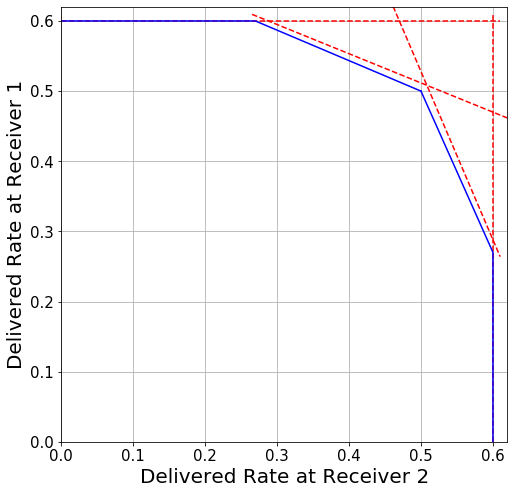

In [21]:
 #======= This plot is done for specific example when p_val_d_1=p_val_d_2=0.6 and p_val_c_1=p_val_c_2=0.3 =======#
     #=== Since we use the Ordinary and Modified Procedures to find the Stable throughput region, we insert ===#
                 # == the stable rates as "out_lambda_1" and "out_lambda_2" manually in this part == #


## ---- Information-theoretic outer-bounds ---- ## 

print("The information-theoretic outer-bounds can be respresented as:")
print('R1 = ', p_val_d_1)
print('R2 = ', p_val_d_2)
p_val_d=p_val_d_1
p_val_c=p_val_c_1
a1=1
b1=(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1
c1=((p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_1-p_val_d_2*p_val_c_1))/p_val_c_1

print('R1 +',format(b1, '.3f'),'R2 =', format(c1,'.3f'))
a2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2
b2=1
c2=(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_2-p_val_d_1*p_val_c_2)/p_val_c_2

print(format(a2, '.3f'),'R1 +','R2 =', format(c2, '.3f'))


plt.figure(figsize=(8,8))

## ---- Plot outer-bounds ---- ## 
def f1(t):
    return t*p_val_d-t*p_val_d+p_val_d
def f2(t):
    return -(p_val_d+p_val_c-p_val_d*p_val_c)/p_val_c*t+((p_val_d+p_val_c-p_val_d*p_val_c)**2)/p_val_c
L1=np.arange(0,(p_val_d+0.02),0.01)
plt.plot(L1, f1(L1), '--r')  
plt.plot(f1(L1),L1,  '--r') 
plt.plot(L1, f2(L1), '--r')
plt.plot(f2(L1),L1,  '--r') 

plt.xlabel('Delivered Rate at Receiver 2')
plt.ylabel('Delivered Rate at Receiver 1')

## ---- Plot Stable throughput region ---- ##

out_lambda_1= [0.  ,  0.27 , 0.5,  0.  ]
out_lambda_2= [0.6 ,   0.6 ,0.5  , 0.  ]
count=0
a=1
b=0
while a!=0 or b!=0:
    a=out_lambda_1[count]
    b=out_lambda_2[count]
    count=count+1


out_lambda_11=out_lambda_1[:(count-1)]
out_lambda_22=out_lambda_2[:(count-1)]
plt.plot(out_lambda_22, out_lambda_11, '-b')
plt.plot(out_lambda_11, out_lambda_22, '-b')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.ylim(0, p_val_d+0.02);
plt.xlim(0, p_val_d+0.02)
plt.grid()
plt.show()